In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.datasets import fetch_covtype
# loading the dataset
data = fetch_covtype(as_frame=True).frame


In [ ]:
# Load the dataset
#data = pd.read_csv('F:\\InternShip\\ForestCoverTypeClassification\\ForestCoverTypeClassification.csv')

In [53]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [55]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [56]:
data.shape

(581012, 55)

In [57]:
data.duplicated().sum()

np.int64(0)

In [58]:
# x and y split
X = data.drop(columns=['Cover_Type'], axis=1)
y = data['Cover_Type']

In [59]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape

(464809, 54)

In [61]:
x_test.shape

(116203, 54)

Train Model 

In [62]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 95.57%


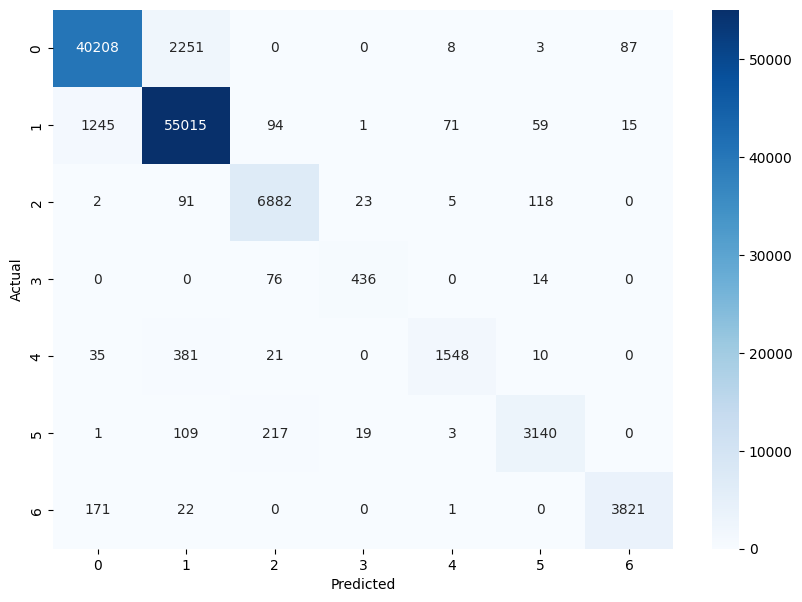

In [65]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

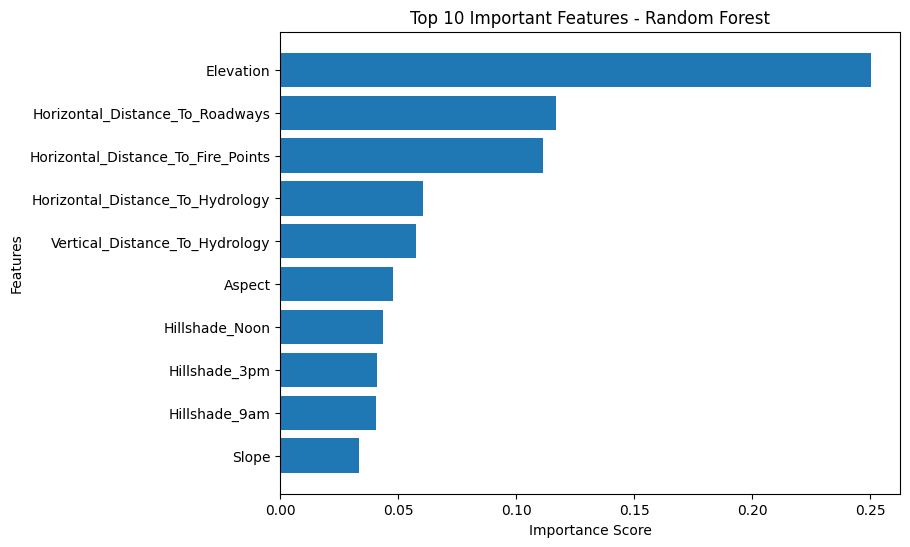

In [67]:
import numpy as np

# Feature importance from RandomForest
importances = rfc.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Encode y values (1–7 -> 0–6)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)



In [70]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False,
                    objective='multi:softmax',   # multi-class classification
                    num_class=len(np.unique(y_train_enc)),  # total classes
                    eval_metric='mlogloss',
                    random_state=42)

xgb.fit(X_train, y_train_enc)
y_pred_xgb = xgb.predict(x_test)

c:\Users\Mani\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [71]:
# Accuracy
accuracy_xgb = accuracy_score(y_test_enc, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb*100:.2f}%')

XGBoost Accuracy: 87.12%


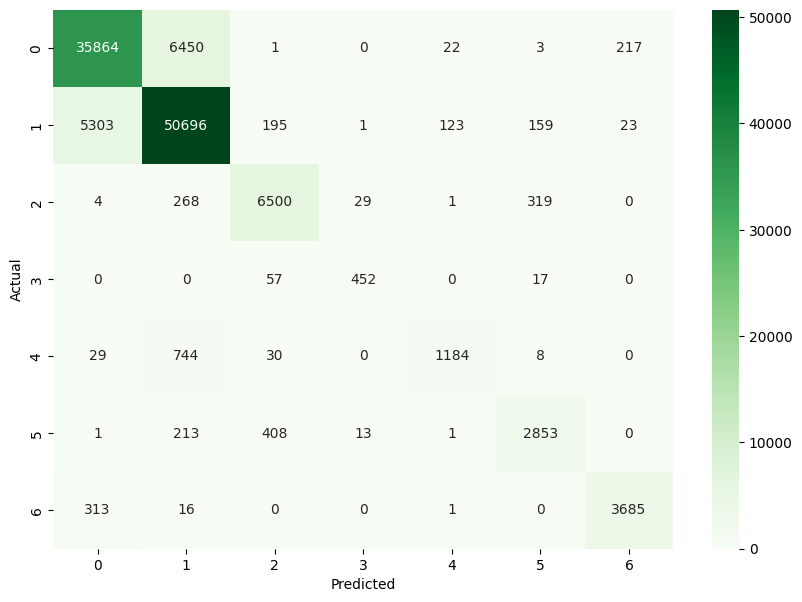

In [72]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_xgb = confusion_matrix(y_test_enc, y_pred_xgb)
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()

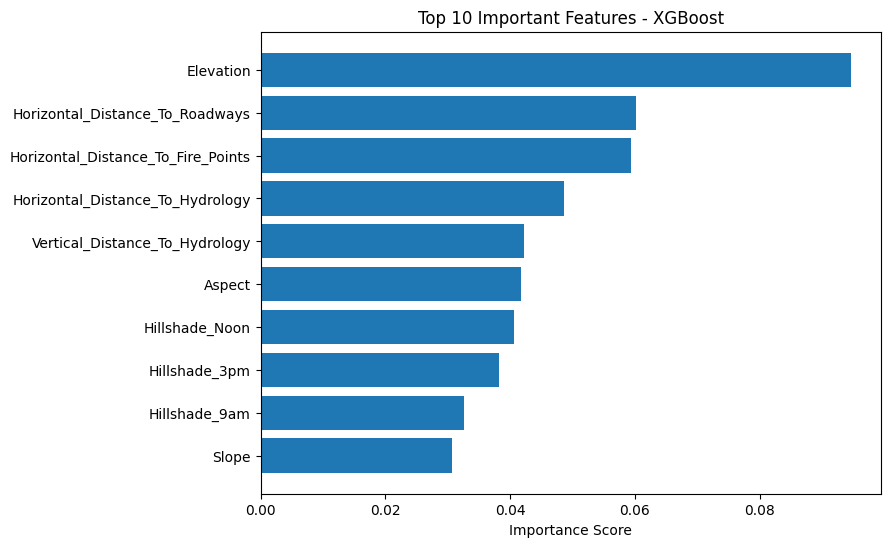

In [73]:
# Feature Importance from XGBoost
importances_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[-10:]  # Top 10 features
plt.figure(figsize=(8,6))
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], align="center")
plt.yticks(range(len(indices_xgb)), [X_train.columns[i] for i in indices   ])
plt.title("Top 10 Important Features - XGBoost")
plt.xlabel("Importance Score")  
plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# model define karo
xgb = XGBClassifier(use_label_encoder=False,
                    objective='multi:softmax',
                    eval_metric='mlogloss',
                    random_state=42)



In [79]:
# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # trees ki count
    'max_depth': [3, 5, 7],               # tree ki depth
    'learning_rate': [0.01, 0.05, 0.1],   # learning step
    'subsample': [0.8, 1.0],              # dataset ka fraction
    'colsample_bytree': [0.8, 1.0]        # features ka fraction
}



In [80]:
# GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=3,       # 3-fold cross validation
                        verbose=2,
                        n_jobs=-1)  # parallel processing



In [ ]:
# fit model
grid_search.fit(X_train, y_train_enc)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# best parameters
print("Best Parameters:", grid_search.best_params_)

# best estimator
best_xgb = grid_search.best_estimator_



In [ ]:
# prediction
y_pred_best = best_xgb.predict(X_test)

# accuracy
accuracy_best = accuracy_score(y_test_enc, y_pred_best)
print(f"Best XGBoost Accuracy: {accuracy_best*100:.2f}%")